In [1]:
import pandas as pd

DATA = '/kaggle/input/atmospheric-and-oceanic-dynamics/Data_Fully_Refined.csv'
df = pd.read_csv(filepath_or_buffer=DATA, parse_dates=['Date'], dayfirst=True)
df['year'] = df['Date'].dt.year
df.head()

,Date,GMSL (Church & White 2011),Long-run CO2 concentration,CO2 Global Emissions,Long-run N2O concentration,Per-capita N2O emissions in CO2 equivalents,Per-capita CH4 emissions in CO2 equivalents,Global land avg temp. anomaly (relative to 1961-90 average),Global Sea surface temp. anomaly (relative to 1961-90 average),Artic Sea Ice Extent Avg,Antartica Sea Ice Extent Avg,Nino Index 1.2,Nino Index 3,year
0,1880-01-31,-180.236283,287.770720,858055700.0,275.6600,0.168686,1.090627,-0.315832,-0.203400,17.604087,12.241826,24.29,24.57,1880
1,1880-02-29,-179.636515,287.901087,860548141.7,275.6725,0.168764,1.091156,-0.308867,-0.199175,17.599791,12.241333,26.50,25.73,1880
2,1880-03-31,-179.036747,288.031454,863040583.3,275.6850,0.168843,1.091684,-0.301901,-0.194950,17.595494,12.240839,26.40,26.43,1880
3,1880-04-30,-178.436979,288.161821,865533025.0,275.6975,0.168921,1.092212,-0.294935,-0.190725,17.591198,12.240345,25.29,26.88,1880
4,1880-05-31,-177.837210,288.292188,868025466.7,275.7100,0.168999,1.092741,-0.287970,-0.186500,17.586901,12.239852,24.16,26.36,1880


We would expect a bunch of these variables to be highly correlated; let's take a quick look at the correlation matrix.

<Axes: >

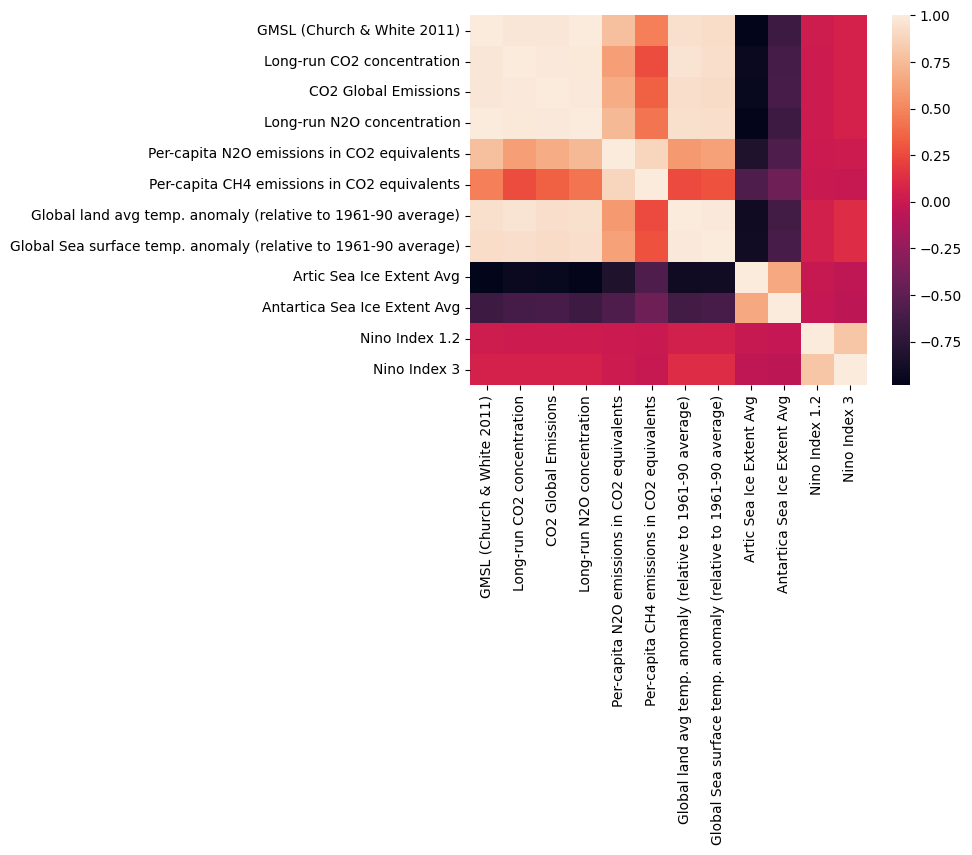

In [2]:
from seaborn import heatmap

heatmap(df.drop(columns=['Date', 'year']).corr())

We do in fact have some very highly correlated variables in our data. In particular, emissions and temperature anomalies are highly correlated.

The obvious thing to do with this data is to make time series plots. But our data is of rather different scales, so we'll need more than one.

In [3]:
from plotly import express
from plotly import io

io.renderers.default = 'iframe'
express.scatter(data_frame=df, x='Date', y='CO2 Global Emissions', color='year', log_y=False)

Maybe it makes more sense to look at global emissions using a log scale.

In [4]:
express.scatter(data_frame=df, x='Date', y='CO2 Global Emissions', color='year', log_y=True)

What do we see? This graph definitely has sections where emissions appear to be growing exponentially, and sections where the change is essentially flat. And of course emissions fall during the Great Depression.

In [5]:
express.line(data_frame=df[['Date', 'GMSL (Church & White 2011)', 'Long-run CO2 concentration','Long-run N2O concentration',]].melt(id_vars=['Date']), x='Date', y='value', color='variable')

In [6]:
express.line(data_frame=df[['Date', 
       'Per-capita N2O emissions in CO2 equivalents',
       'Per-capita CH4 emissions in CO2 equivalents',
       'Global land avg temp. anomaly (relative to 1961-90 average)',
       'Global Sea surface temp. anomaly (relative to 1961-90 average)',
       'Artic Sea Ice Extent Avg', 'Antartica Sea Ice Extent Avg',
       'Nino Index 1.2', 'Nino Index 3']].melt(id_vars=['Date']), x='Date', y='value', color='variable')

That sea ice data looks odd prior to 1980.

In [7]:
express.line(data_frame=df[['Date','Nino Index 1.2', 'Nino Index 3']].melt(id_vars=['Date']), x='Date', y='value', color='variable')

We have monthly data for these but we would expect them to exhibit seasonality. Can we get better pictures by smoothing them out?

In [8]:
express.line(data_frame=df[['Date','Nino Index 1.2', 'Nino Index 3']].set_index('Date').resample('YE').mean().reset_index().melt(id_vars=['Date']),
             x='Date', y='value', color='variable')

Is this better? It still looks like noise, but at least now it is annual noise.